<a href="https://colab.research.google.com/github/tarcisiocsn/OpenDataQuebec/blob/main/cluster_count_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis - Using the count flow data

In [14]:
# import packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [15]:
histo_merged_direction = pd.read_csv(r'/histo_merged_direction.csv')
histo_merged_direction

,SECTN,ANNEE,DJMA_total,DJME_total,DJMH_total
0,0001012500,2011,78000.0,84000.0,74000.0
1,0001012500,2012,76000.0,82000.0,74000.0
2,0001012500,2013,78000.0,85000.0,74000.0
3,0001012500,2014,78000.0,85000.0,74000.0
4,0001012500,2015,80000.0,86000.0,75000.0
...,...,...,...,...,...
4756,S001346879,2016,490.0,490.0,480.0
4757,S001346879,2019,460.0,440.0,460.0
4758,S001346879,2020,230.0,180.0,350.0
4759,S001346879,2021,220.0,210.0,210.0


In [4]:
fact84_merged_direction = pd.read_csv(r'/fact84_merged_direction.csv')
fact84_merged_direction

,SECTN,VOIE_11,ANNEE,MOIS,VOIE_12,DIMANCHE,LUNDI,MARDI,MERCREDI,JEUDI,VENDREDI,SAMEDI,MOYEN
0,0005512000,11.0,2016,Janvier,12.0,10170.0,10400.0,9640.0,10180.0,10490,13200.0,9800,10600.0
1,0005512000,11.0,2016,Février,12.0,10780.0,10710.0,10580.0,10720.0,11680,13970.0,10420,11300.0
2,0005512000,11.0,2016,Mars,12.0,12060.0,10770.0,11170.0,11410.0,12260,13850.0,11780,11900.0
3,0005512000,11.0,2016,Avril,12.0,11910.0,11280.0,11220.0,11660.0,12450,14590.0,12390,12300.0
4,0005512000,11.0,2016,Mai,12.0,13270.0,12090.0,11880.0,12130.0,12920,15370.0,12860,12900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47431,0002062000,NaN,2018,Août,12.0,22080.0,16230.0,14790.0,15230.0,17230,19850.0,19330,17800.0
47432,0002062000,NaN,2018,Septembre,12.0,15290.0,12280.0,11360.0,12000.0,13070,14720.0,12450,13000.0
47433,0002062000,NaN,2018,Octobre,12.0,12670.0,11400.0,10800.0,11080.0,12100,13530.0,11260,11800.0
47434,0002062000,NaN,2018,Novembre,12.0,11420.0,10010.0,9180.0,9390.0,11010,12610.0,9280,10400.0


In [5]:
fact84_merged_direction.drop(columns=['VOIE_11', 'VOIE_12'], inplace=True)

In [6]:
hour_merged_direction = pd.read_csv(r'/hour_merged_direction.csv')
hour_merged_direction

,SECTN,ANNEE,VOIE_11,HRE,VOIE_12,DIMANCHE,SAMEDI,OUVRABLE
0,0005512000,2016,11.0,0-1,12.0,184.0,160.0,77.0
1,0005512000,2016,11.0,1-2,12.0,90.0,72.0,35.0
2,0005512000,2016,11.0,2-3,12.0,46.0,42.0,31.0
3,0005512000,2016,11.0,3-4,12.0,31.0,36.0,35.0
4,0005512000,2016,11.0,4-5,12.0,25.0,41.0,80.0
...,...,...,...,...,...,...,...,...
98845,0002062000,2018,NaN,20-21,12.0,512.0,366.0,332.0
98846,0002062000,2018,NaN,21-22,12.0,308.0,341.0,245.0
98847,0002062000,2018,NaN,22-23,12.0,175.0,289.0,172.0
98848,0002062000,2018,NaN,23-24,12.0,96.0,179.0,108.0


In [7]:
hour_merged_direction.drop(columns=['VOIE_11', 'VOIE_12'], inplace=True)

In [8]:
# Merge the fact84_merged_direction and histo_merged_direction dataframes on SECTN and ANNEE
normalize_fact84_merged = fact84_merged_direction.merge(histo_merged_direction, on=['SECTN', 'ANNEE'], how='left')

# List of columns to normalize
columns_to_normalize = ['DIMANCHE', 'LUNDI', 'MARDI', 'MERCREDI', 'JEUDI', 'VENDREDI', 'SAMEDI', 'MOYEN']

# Loop through the columns and perform the normalization
for column in columns_to_normalize:
    normalize_fact84_merged[column] = normalize_fact84_merged[column] / normalize_fact84_merged['DJMA_total']

normalize_fact84_merged

,SECTN,ANNEE,MOIS,DIMANCHE,LUNDI,MARDI,MERCREDI,JEUDI,VENDREDI,SAMEDI,MOYEN,DJMA_total,DJME_total,DJMH_total
0,0005512000,2016,Janvier,0.788372,0.806202,0.747287,0.789147,0.813178,1.023256,0.759690,0.821705,12900.0,14400.0,11300.0
1,0005512000,2016,Février,0.835659,0.830233,0.820155,0.831008,0.905426,1.082946,0.807752,0.875969,12900.0,14400.0,11300.0
2,0005512000,2016,Mars,0.934884,0.834884,0.865891,0.884496,0.950388,1.073643,0.913178,0.922481,12900.0,14400.0,11300.0
3,0005512000,2016,Avril,0.923256,0.874419,0.869767,0.903876,0.965116,1.131008,0.960465,0.953488,12900.0,14400.0,11300.0
4,0005512000,2016,Mai,1.028682,0.937209,0.920930,0.940310,1.001550,1.191473,0.996899,1.000000,12900.0,14400.0,11300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47431,0002062000,2018,Août,1.871186,1.375424,1.253390,1.290678,1.460169,1.682203,1.638136,1.508475,11800.0,14600.0,9500.0
47432,0002062000,2018,Septembre,1.295763,1.040678,0.962712,1.016949,1.107627,1.247458,1.055085,1.101695,11800.0,14600.0,9500.0
47433,0002062000,2018,Octobre,1.073729,0.966102,0.915254,0.938983,1.025424,1.146610,0.954237,1.000000,11800.0,14600.0,9500.0
47434,0002062000,2018,Novembre,0.967797,0.848305,0.777966,0.795763,0.933051,1.068644,0.786441,0.881356,11800.0,14600.0,9500.0


In [9]:
# Merge the fact84_merged_direction and histo_merged_direction dataframes on SECTN and ANNEE
normalize_hour_merged = hour_merged_direction.merge(histo_merged_direction, on=['SECTN', 'ANNEE'], how='left')

# List of columns to normalize
columns_to_normalize = ['DIMANCHE', 'SAMEDI', 'OUVRABLE']

# Loop through the columns and perform the normalization
for column in columns_to_normalize:
    normalize_hour_merged[column] = normalize_hour_merged[column] / normalize_hour_merged['DJMA_total']

normalize_hour_merged

,SECTN,ANNEE,HRE,DIMANCHE,SAMEDI,OUVRABLE,DJMA_total,DJME_total,DJMH_total
0,0005512000,2016,0-1,0.014264,0.012403,0.005969,12900.0,14400.0,11300.0
1,0005512000,2016,1-2,0.006977,0.005581,0.002713,12900.0,14400.0,11300.0
2,0005512000,2016,2-3,0.003566,0.003256,0.002403,12900.0,14400.0,11300.0
3,0005512000,2016,3-4,0.002403,0.002791,0.002713,12900.0,14400.0,11300.0
4,0005512000,2016,4-5,0.001938,0.003178,0.006202,12900.0,14400.0,11300.0
...,...,...,...,...,...,...,...,...,...
98845,0002062000,2018,20-21,0.043390,0.031017,0.028136,11800.0,14600.0,9500.0
98846,0002062000,2018,21-22,0.026102,0.028898,0.020763,11800.0,14600.0,9500.0
98847,0002062000,2018,22-23,0.014831,0.024492,0.014576,11800.0,14600.0,9500.0
98848,0002062000,2018,23-24,0.008136,0.015169,0.009153,11800.0,14600.0,9500.0


In [10]:
# Define the order of months
month_order = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Define the custom order of hours
hour_order = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12',
              '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']


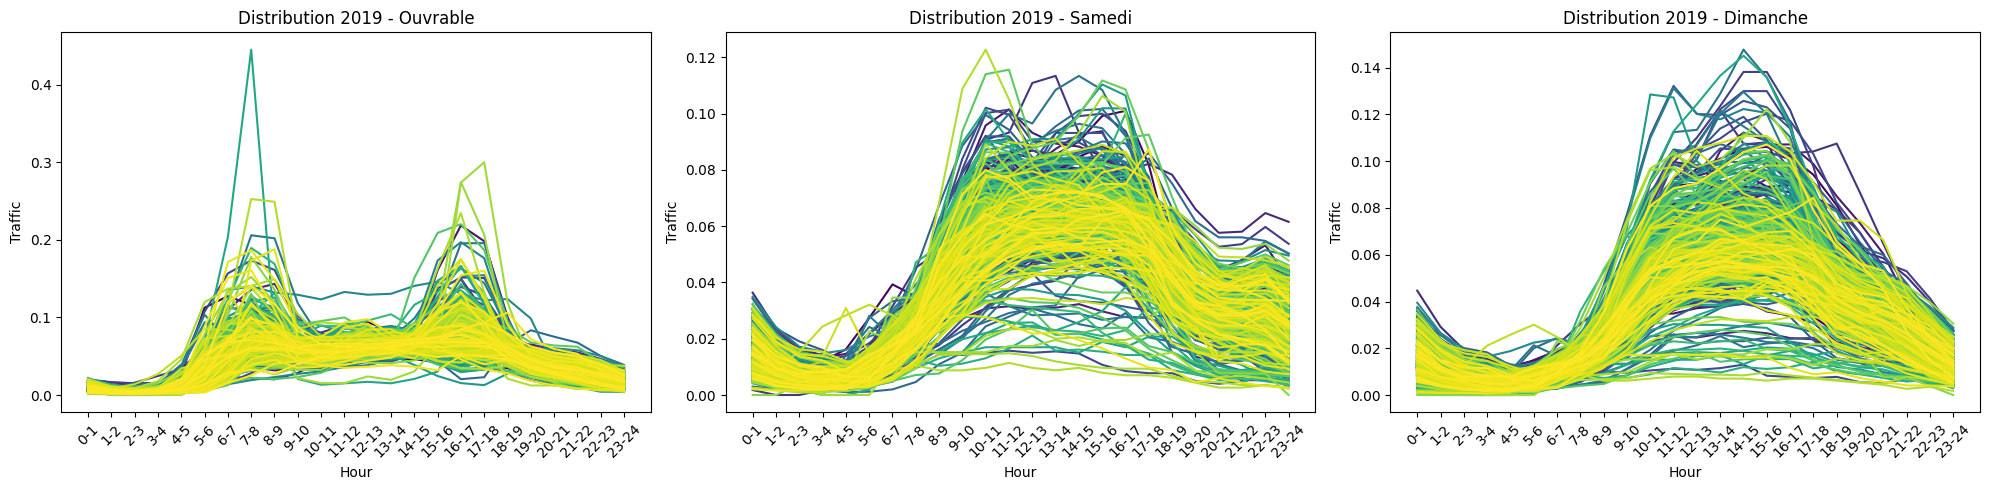

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'normalize_hour_merged' is your DataFrame and 'hour_order' is your list for ordering hours
year = 2019  # The year you're interested in
sectn_values = normalize_hour_merged[normalize_hour_merged['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df = normalize_hour_merged[(normalize_hour_merged['ANNEE'] == year) &
                                    (normalize_hour_merged['SECTN'].isin(sectn_values)) &
                                    (normalize_hour_merged['HRE'].isin(hour_order))]

# Define the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Plot for OUVRABLE
sns.lineplot(data=filtered_df, x='HRE', y='OUVRABLE', hue='SECTN', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Distribution 2019 - Ouvrable')
axes[0].set(xlabel='Hour', ylabel='Traffic')
axes[0].set_xticks(range(len(hour_order)))  # Set the ticks to match the number of labels
axes[0].set_xticklabels(hour_order, rotation=45)

# Plot for SAMEDI
sns.lineplot(data=filtered_df, x='HRE', y='SAMEDI', hue='SECTN', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Distribution 2019 - Samedi')
axes[1].set(xlabel='Hour', ylabel='Traffic')
axes[1].set_xticks(range(len(hour_order)))  # Set the ticks to match the number of labels
axes[1].set_xticklabels(hour_order, rotation=45)

# Plot for DIMANCHE
sns.lineplot(data=filtered_df, x='HRE', y='DIMANCHE', hue='SECTN', ax=axes[2], palette='viridis', legend=False)
axes[2].set_title('Distribution 2019 - Dimanche')
axes[2].set(xlabel='Hour', ylabel='Traffic')
axes[2].set_xticks(range(len(hour_order)))  # Set the ticks to match the number of labels
axes[2].set_xticklabels(hour_order, rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


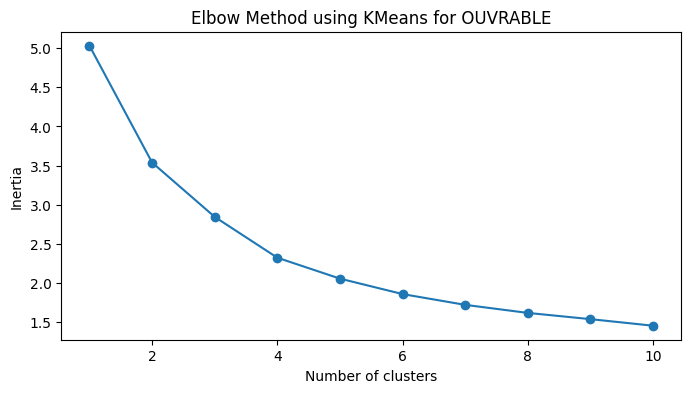

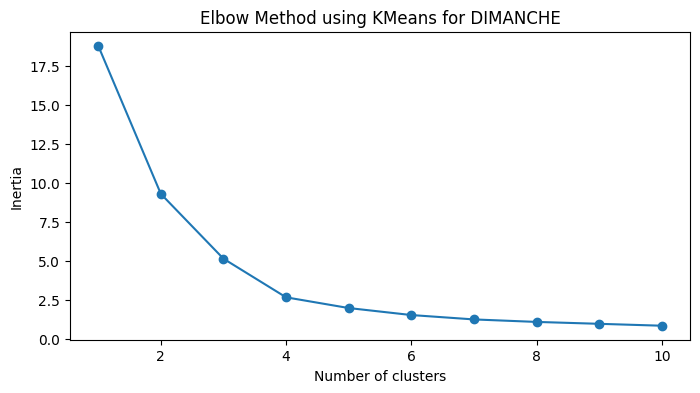

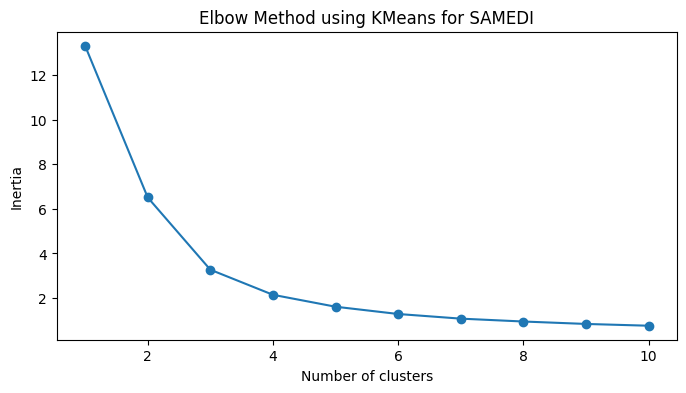

In [17]:
from sklearn.cluster import KMeans

def fit_kmeans(data, n_clusters=4, n_init=10):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0).fit(data)
    return kmeans.labels_

def calculate_elbow_with_kmeans(data, max_clusters=10, n_init=10):
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=n_init, random_state=0).fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Define the function to process data and plot elbow
def process_and_plot_elbow_kmeans(df, hour_column, value_column, max_clusters=10):
    # Pivot the DataFrame
    df_pivot = df[df['ANNEE'] == 2019].pivot(index='SECTN', columns=hour_column, values=value_column)
    df_pivot.fillna(0, inplace=True)

    # Convert the pivot table to a 2D numpy array
    X = np.array(df_pivot)

    # Calculate inertia using KMeans
    inertia = calculate_elbow_with_kmeans(X, max_clusters, n_init=10)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title(f'Elbow Method using KMeans for {value_column}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

# Run the process for each traffic type
process_and_plot_elbow_kmeans(normalize_hour_merged, 'HRE', 'OUVRABLE', max_clusters=10)
process_and_plot_elbow_kmeans(normalize_hour_merged, 'HRE', 'DIMANCHE', max_clusters=10)
process_and_plot_elbow_kmeans(normalize_hour_merged, 'HRE', 'SAMEDI', max_clusters=10)


In [19]:
from sklearn.cluster import KMeans

def add_cluster_labels(df, hour_column, value_column, n_clusters=4, suffix=''):
    # First, ensure that there are no duplicate entries for the combination of SECTN and hour_column
    df_agg = df.groupby(['SECTN', hour_column])[value_column].mean().reset_index()

    # Now you can pivot without duplicates
    df_pivot = df_agg.pivot(index='SECTN', columns=hour_column, values=value_column)
    df_pivot.fillna(0, inplace=True)

    # The rest of your code remains the same...
    X = df_pivot.values
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_

    label_column = 'cluster' + suffix
    label_series = pd.Series(labels, index=df_pivot.index)
    df[label_column] = df['SECTN'].map(label_series.to_dict())

    return df

# The column containing hour ranges
hour_column = 'HRE'

# Perform clustering for each type of day
normalize_hour_merged = add_cluster_labels(normalize_hour_merged, hour_column, 'OUVRABLE', n_clusters=3, suffix='_OUVRABLE')
normalize_hour_merged = add_cluster_labels(normalize_hour_merged, hour_column, 'SAMEDI', n_clusters=3, suffix='_SAMEDI')
normalize_hour_merged = add_cluster_labels(normalize_hour_merged, hour_column, 'DIMANCHE', n_clusters=3, suffix='_DIMANCHE')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Assuming 'normalize_hour_merged' is your DataFrame and 'hour_order' is your list for ordering hours
year = 2019  # The year you're interested in
sectn_values2 = normalize_hour_merged[normalize_hour_merged['ANNEE'] == year]['SECTN'].unique()

# Filter the DataFrame to only include rows where 'HRE' is in 'hour_order'
filtered_df2 = normalize_hour_merged[(normalize_hour_merged['ANNEE'] == year) &
                                    (normalize_hour_merged['SECTN'].isin(sectn_values)) &
                                    (normalize_hour_merged['HRE'].isin(hour_order))]


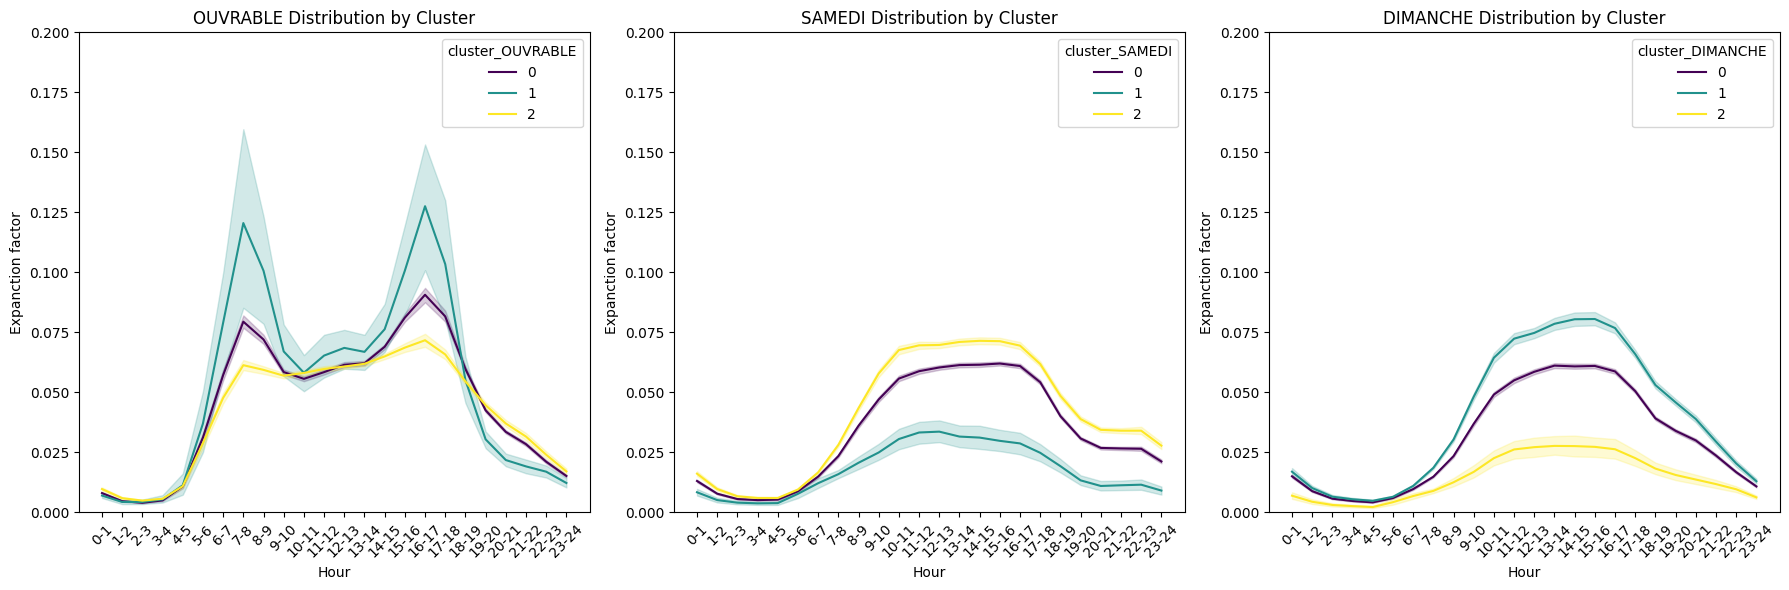

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define your y-axis limits if known, for example:
y_limits = (0, 0.2)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# OUVRABLE
sns.lineplot(data=filtered_df2, x='HRE', y='OUVRABLE', hue='cluster_OUVRABLE', palette='viridis', ax=axes[0])
axes[0].set_title('OUVRABLE Distribution by Cluster')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Expanction factor')
axes[0].set_xticks(range(len(hour_order)))  # Set the ticks to match the hour order
axes[0].set_xticklabels(hour_order, rotation=45)
axes[0].legend(title='cluster_OUVRABLE')
axes[0].set_ylim(y_limits)

# SAMEDI
sns.lineplot(data=filtered_df2, x='HRE', y='SAMEDI', hue='cluster_SAMEDI', palette='viridis', ax=axes[1])
axes[1].set_title('SAMEDI Distribution by Cluster')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Expanction factor')
axes[1].set_xticks(range(len(hour_order)))  # Set the ticks to match the hour order
axes[1].set_xticklabels(hour_order, rotation=45)
axes[1].legend(title='cluster_SAMEDI')
axes[1].set_ylim(y_limits)

# DIMANCHE
sns.lineplot(data=filtered_df2, x='HRE', y='DIMANCHE', hue='cluster_DIMANCHE', palette='viridis', ax=axes[2])
axes[2].set_title('DIMANCHE Distribution by Cluster')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Expanction factor')
axes[2].set_xticks(range(len(hour_order)))  # Set the ticks to match the hour order
axes[2].set_xticklabels(hour_order, rotation=45)
axes[2].legend(title='cluster_DIMANCHE')
axes[2].set_ylim(y_limits)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()